# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Muhammad Fathi Radithya
- **Email:** muhammadfathi@student.ub.ac.id
- **ID Dicoding:** fathi-mfr

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca (weathersit) terhadap bike sharing di Washington DC?
- Apakah tren pengguna (baik casual atau registered) dalam penggunaan bike sharing dalam tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

In [3]:
df_day.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df_hour.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Dataset mengagregasikan data peminjaman sepeda dalam dua level waktu, hari (731 hari tercatat) dan jam (17.359 jam tercatat).

Dataset memiliki struktur kolom yang seragam antara file hour.csv dan day.csv, kecuali kolom hr yang hanya ada di data per jam. Berikut penjelasan masing-masing kolom:

* instant: Indeks atau nomor urut setiap record.
* dteday: Tanggal terjadinya pencatatan data.
* season: Menunjukkan musim dalam setahun, dengan kode:
  * 1: Spring
  * 2: Summer
  * 3: Fall
  * 4: Winter
* yr: Menandakan tahun
  * 0: untuk 2011
  * 1: untuk 2012.
* mnth: Bulan dalam tahun (1 sampai 12).
* hr: Jam dalam sehari (0 sampai 23).
* holiday: Menandakan apakah hari tersebut adalah hari libur resmi.
* weekday:Menunjukkan hari dalam seminggu.
* workingday:ndikator apakah hari tersebut merupakan hari kerja
  * 1: jika hari kerja
  * 0: jika akhir pekan atau hari libur.
* weathersit: Kategori kondisi cuaca dengan kode:
  * 1: Cuaca cerah dan sedikit berawan.
  * 2: Berkabut atau mendung.
  * 3: Hujan ringan atau salju ringan dengan kemungkinan badai petir ringan.
  * 4: Hujan lebat, salju dengan embun es, atau kondisi cuaca ekstrim lainnya.
* temp: Suhu udara yang dinormalisasi (dalam Celsius) dengan pembagi 41 (nilai maksimum).
* atemp: Suhu "perasaan" atau "feels like" yang dinormalisasi dengan pembagi 50 (nilai maksimum).
* hum: Kelembaban udara yang dinormalisasi dengan pembagi 100 (nilai maksimum).
* windspeed: Kecepatan angin yang dinormalisasi dengan pembagi 67 (nilai maksimum).
* casual: Jumlah pengguna tidak terdaftar (casual users).
* registered: Jumlah pengguna terdaftar (registered users).
* cnt: Total jumlah peminjaman sepeda (penjumlahan casual dan registered).


### Assessing Data

#### Missing Value

Nilai yang hilang dari sebuah data dan biasanya direpresentasikan sebagai nilai NaN

In [5]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:** Kedua dataframe tidak memiliki missing value.

#### Duplicate Data

Observasi dimana semua nilai dalam satu unit baris yang memiliki nilai yang sama persis pada setiap kolomnya.

In [7]:
print("Jumlah Duplikasi DF Day: ", df_day.duplicated().sum())

Jumlah Duplikasi DF Day:  0


In [8]:
print("Jumlah Duplikasi DF Hour: ", df_hour.duplicated().sum())

Jumlah Duplikasi DF Hour:  0


**Insight:** Kedua dataframe tidak memiliki duplicate value.

#### Invalid Value

Nilai yang tidak masuk akal, tidak sesuai dengan ketentuan

In [9]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:** dteday pada kedua dataframe perlu diubah menjadi datetime.

#### Inaccurate Value

Nilai dalam sebuah data tidak sesuai dengan hasil observasi, umumnya dikarenakan adanya human atau sistem error.

In [13]:
df_day['validasi'] = df_day['cnt'] == (df_day['casual'] + df_day['registered'])

df_day_inaccurate = df_day[df_day['validasi'] == False]

day_inaccurate_count = len(df_day_inaccurate)

day_total_rows = len(df_day)

print(f"Jumlah baris tidak sesuai di DF Day: {day_inaccurate_count}")
print(f"Jumlah total baris di DF Day: {day_total_rows}")

Jumlah baris tidak sesuai di DF Day: 0
Jumlah total baris di DF Day: 731


In [14]:
df_hour['validasi'] = df_hour['cnt'] == (df_hour['casual'] + df_hour['registered'])

df_hour_inaccurate = df_hour[df_hour['validasi'] == False]

hour_inaccurate_count = len(df_hour_inaccurate)

hour_total_rows = len(df_hour)

print(f"Jumlah baris tidak sesuai di DF Hour: {hour_inaccurate_count}")
print(f"Jumlah total baris di DF Hour: {hour_total_rows}")

Jumlah baris tidak sesuai di DF Hour: 0
Jumlah total baris di DF Hour: 17379


**Insight:** Kedua dataframe tidak memiliki value yang tidak akurat.

#### Inconsistent Value

Nilai yang tidak konsisten baik dari segi satuan maupun ketentuan penilaian, umumnya muncul karena adanya perbedaan standar dalam proses pengumpulan nilai.

In [15]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

full_dates = pd.date_range(start=df_day['dteday'].min(), end=df_day['dteday'].max())

present_dates = pd.to_datetime(df_day['dteday'].unique())

missing_dates = full_dates.difference(present_dates)

print(f"Jumlah tanggal yang hilang:", len(missing_dates))
print(missing_dates)

Jumlah tanggal yang hilang: 0
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [16]:
df_hour['datetime'] = pd.to_datetime(df_hour['dteday']) + pd.to_timedelta(df_hour['hr'], unit='h')

start_date = '2011-01-01'
end_date   = '2012-12-31'
mask = (df_hour['datetime'] >= start_date) & (df_hour['datetime'] <= end_date + ' 23:00:00')
df_filtered = df_hour.loc[mask].copy()

full_range = pd.date_range(start=start_date, end=end_date + ' 23:00:00', freq='h')

present_hours = pd.to_datetime(df_filtered['datetime'].drop_duplicates()).sort_values()
missing_hours = full_range.difference(present_hours)

print("Jumlah jam yang hilang:", len(missing_hours))
print(missing_hours)

Jumlah jam yang hilang: 165
DatetimeIndex(['2011-01-02 05:00:00', '2011-01-03 02:00:00',
               '2011-01-03 03:00:00', '2011-01-04 03:00:00',
               '2011-01-05 03:00:00', '2011-01-06 03:00:00',
               '2011-01-07 03:00:00', '2011-01-11 03:00:00',
               '2011-01-11 04:00:00', '2011-01-12 03:00:00',
               ...
               '2012-10-30 07:00:00', '2012-10-30 08:00:00',
               '2012-10-30 09:00:00', '2012-10-30 10:00:00',
               '2012-10-30 11:00:00', '2012-10-30 12:00:00',
               '2012-11-08 03:00:00', '2012-11-29 03:00:00',
               '2012-12-24 04:00:00', '2012-12-25 03:00:00'],
              dtype='datetime64[ns]', length=165, freq=None)


**Insight:** 165 baris tidak ditemukan dalam dataframe hour, jika dihitung dari 731 hari x 24 jam, seharusnya terdapat 17.544 jam.

#### Outlier

titik data yang berada sangat jauh dari titik data yang lain dalam sebuah dataset. Perhitungan menggunakan IQR, mengidentifikasi outlier dengan cara membuat nilai cut-off

In [17]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

outliers_cnt_day = detect_outliers_iqr(df_day, 'cnt')
print("Jumlah outlier pada kolom 'cnt' di df_day:", len(outliers_cnt_day))
display(outliers_cnt_day.head())

outliers_cnt_hour = detect_outliers_iqr(df_hour, 'cnt')
print("Jumlah outlier pada kolom 'cnt' di df_hour:", len(outliers_cnt_hour))
display(outliers_cnt_hour.head())

Jumlah outlier pada kolom 'cnt' di df_day: 0


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,validasi


Jumlah outlier pada kolom 'cnt' di df_hour: 505


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,validasi,datetime
5536,5537,2011-08-23,3,0,8,14,0,2,1,1,0.72,0.6515,0.30,0.0896,149,502,651,True,2011-08-23 14:00:00
10358,10359,2012-03-12,1,1,3,17,0,1,1,2,0.62,0.6212,0.38,0.4179,87,557,644,True,2012-03-12 17:00:00
10359,10360,2012-03-12,1,1,3,18,0,1,1,2,0.60,0.6212,0.43,0.1940,89,623,712,True,2012-03-12 18:00:00
10382,10383,2012-03-13,1,1,3,17,0,2,1,1,0.70,0.6364,0.37,0.1045,62,614,676,True,2012-03-13 17:00:00
10383,10384,2012-03-13,1,1,3,18,0,2,1,1,0.70,0.6364,0.34,0.2985,96,638,734,True,2012-03-13 18:00:00


**Insight:** 505 jumlah outlier dalam dataframe hour.

### Cleaning Data

Pembersihan data setelah mengidentifikasi masalah pada tahap Asesmen Data.
* Membenarkan kesalahan tipe kode dteday pada dataframe day dan hour menjadi datetime.
* Menghapus kolom pada dataframe yang sudah tidak digunakan lagi.

In [18]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])
  df_day["dteday"] = pd.to_datetime(df_day["dteday"])

In [19]:
df_day = df_day.drop('validasi', axis=1)
df_hour = df_hour.drop('datetime', axis=1)

**Insight:** Cleaning data memastikan bahwa data memiliki format yang konsisten dan hanya memuat kolom yang relevan untuk analisis, sehingga meminimalisir kesalahan dan memudahkan proses eksplorasi serta visualisasi data.

## Exploratory Data Analysis (EDA)

### Explore 1 - Mengecek pola penggunaan bike sharing berdasarkan jam dalam sehari.

Total Penyewaan Berdasarkan Jam:


,Jam,Pengguna
0,00-05 (Dini Hari),106509
1,06-11 (Pagi Hari),907319
2,12-17 (Siang Hari),1292742
3,18-23 (Sore Hari),986109


<ipython-input-20-78da4138b44f>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Jam', y='Pengguna', data=summary, palette='pastel', order=order)


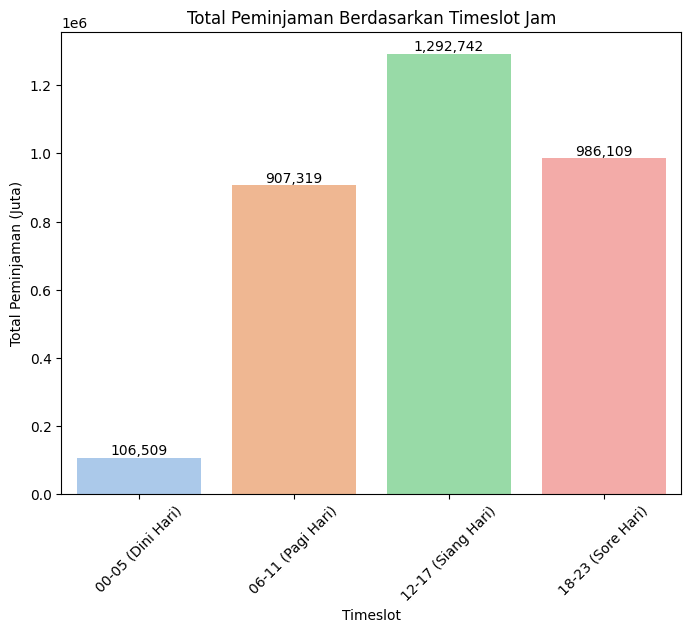

In [20]:
def assign_timeslot(hr):
    if hr < 6:
        return "00-05 (Dini Hari)"
    elif hr < 12:
        return "06-11 (Pagi Hari)"
    elif hr < 18:
        return "12-17 (Siang Hari)"
    else:
        return "18-23 (Sore Hari)"

# Terapkan fungsi ke kolom 'hr' untuk membuat kolom 'Jam'
df_hour['Jam'] = df_hour['hr'].apply(assign_timeslot)

# Agregasi data: hitung total penyewaan (cnt) per timeslot
summary = df_hour.groupby('Jam')['cnt'].sum().reset_index().rename(columns={'cnt': 'Pengguna'})

# Tentukan urutan kategori untuk timeslot agar tampil dengan benar di tabel
order = ["00-05 (Dini Hari)", "06-11 (Pagi Hari)", "12-17 (Siang Hari)", "18-23 (Sore Hari)"]
summary['Jam'] = pd.Categorical(summary['Jam'], categories=order, ordered=True)
summary = summary.sort_values('Jam')

# Tampilkan output dalam bentuk tabel
print("Total Penyewaan Berdasarkan Jam:")
display(summary)

plt.figure(figsize=(8,6))
ax = sns.barplot(x='Jam', y='Pengguna', data=summary, palette='pastel', order=order)
plt.title('Total Peminjaman Berdasarkan Timeslot Jam')
plt.xlabel('Timeslot')
plt.ylabel('Total Peminjaman (Juta)')
plt.xticks(rotation=45)

# Menambahkan label nilai di atas tiap bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

**Insight:** Penggunaan bike sharing lebih dominan pada siang hari, dimana sebagian besar orang-orang lebih aktif dan diluar, diikuti dengan pagi dan sore hari.

In [21]:
df_full = pd.DataFrame({'datetime': full_range})

df_hour_full = pd.merge(df_full, df_filtered, on='datetime', how='left')

df_hour_full.drop(columns='validasi', inplace=True)
display(df_hour_full.head())

,datetime,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01 00:00:00,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [22]:
df_hour_full.isna().sum()

,0
datetime,0
instant,165
dteday,165
season,165
yr,165
mnth,165
hr,165
holiday,165
weekday,165
workingday,165


In [23]:
df_hour_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17544 non-null  datetime64[ns]
 1   instant     17379 non-null  float64       
 2   dteday      17379 non-null  object        
 3   season      17379 non-null  float64       
 4   yr          17379 non-null  float64       
 5   mnth        17379 non-null  float64       
 6   hr          17379 non-null  float64       
 7   holiday     17379 non-null  float64       
 8   weekday     17379 non-null  float64       
 9   workingday  17379 non-null  float64       
 10  weathersit  17379 non-null  float64       
 11  temp        17379 non-null  float64       
 12  atemp       17379 non-null  float64       
 13  hum         17379 non-null  float64       
 14  windspeed   17379 non-null  float64       
 15  casual      17379 non-null  float64       
 16  registered  17379 non-

In [24]:
cols_to_convert = ['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'casual', 'registered', 'cnt']
df_hour_full['dteday'] = pd.to_datetime(df_hour_full['dteday'])

df_hour_full[cols_to_convert] = df_hour_full[cols_to_convert].fillna(0).astype(int)

df_hour_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17544 non-null  datetime64[ns]
 1   instant     17544 non-null  int64         
 2   dteday      17379 non-null  datetime64[ns]
 3   season      17544 non-null  int64         
 4   yr          17544 non-null  int64         
 5   mnth        17544 non-null  int64         
 6   hr          17544 non-null  int64         
 7   holiday     17544 non-null  int64         
 8   weekday     17544 non-null  int64         
 9   workingday  17544 non-null  int64         
 10  weathersit  17544 non-null  int64         
 11  temp        17379 non-null  float64       
 12  atemp       17379 non-null  float64       
 13  hum         17379 non-null  float64       
 14  windspeed   17379 non-null  float64       
 15  casual      17544 non-null  int64         
 16  registered  17544 non-

In [25]:
df_hour_full['dteday'] = pd.to_datetime(df_hour_full['datetime'].dt.date)

day_agg = df_hour.groupby("dteday").agg({
    "season": lambda x: x.mode()[0] if not x.mode().empty else np.nan,
    "temp": "mean",
    "atemp": "mean",
    "hum": "mean",
    "windspeed": "mean",
    "weathersit": lambda x: x.mode()[0] if not x.mode().empty else np.nan,
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
    "workingday": "mean",
    "yr": "mean",
    "mnth": "mean",
    "hr": "mean"
}).reset_index()

df_hour_full = pd.merge(df_hour_full, day_agg, on="dteday", how="left", suffixes=('', '_day'))

fill_columns = ["season", "temp", "atemp", "hum", "windspeed", "weathersit", "casual", "registered", "cnt", "workingday", "yr", "mnth", "hr"]

for col in fill_columns:
    df_hour_full[col] = df_hour_full[col].fillna(df_hour_full[f"{col}_day"])

df_hour_full.drop(columns=[f"{col}_day" for col in fill_columns], inplace=True)
df_hour_full.drop(columns=["datetime"], inplace=True)

print("Jumlah missing value per kolom setelah imputasi:")
print(df_hour_full.isna().sum())
print(df_hour_full.info())

Jumlah missing value per kolom setelah imputasi:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17544 non-null  int64         
 1   dteday      17544 non-null  datetime64[ns]
 2   season      17544 non-null  int64         
 3   yr          17544 non-null  int64         
 4   mnth        17544 non-null  int64         
 5   hr          17544 non-null  int64         
 6   holiday     17544 non-null  int64         
 7   weekday     17544 non-null  int64         
 8   workingday  17544 non-null  int64         
 9   weathersit  17544 non-nu

In [26]:
df_hour_full.to_csv('main_data.csv', index=False)

### Explore 2 - Frekuensi kondisi cuaca yang diobservasi per jam.

Frekuensi Kondisi Cuaca (per Jam):


,Cuaca,Frekuensi
0,Clear/Few clouds,11413
1,Mist/Cloudy,4544
2,Light Snow/Rain,1419
3,Heavy Rain/Snow,3


<ipython-input-27-03f5085ecc17>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Cuaca', y='Frekuensi', data=weather_freq, palette='viridis', order=weather_order)


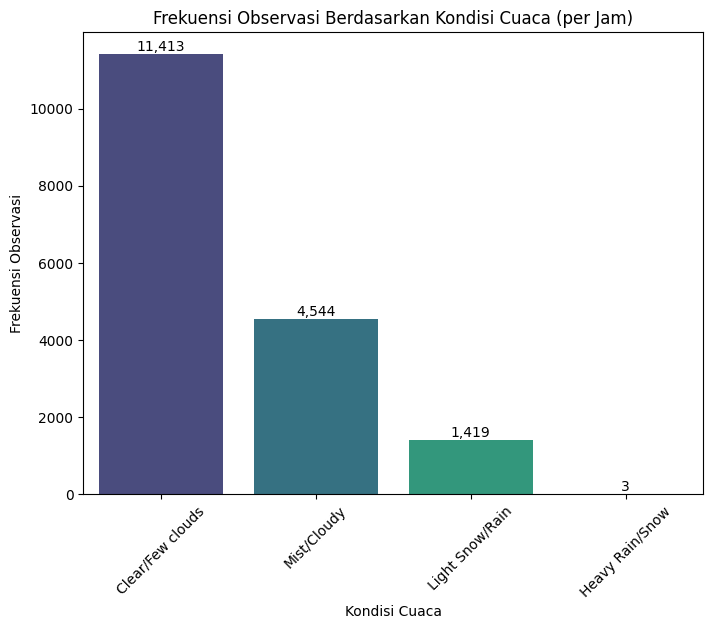

In [27]:
weather_labels = {
    1: "Clear/Few clouds",
    2: "Mist/Cloudy",
    3: "Light Snow/Rain",
    4: "Heavy Rain/Snow"
}
if 'weather_label' not in df_hour_full.columns:
    df_hour_full['weather_label'] = df_hour_full['weathersit'].map(weather_labels)

weather_freq = df_hour_full['weather_label'].value_counts().reset_index()
weather_freq.columns = ['Cuaca', 'Frekuensi']

weather_order = ["Clear/Few clouds", "Mist/Cloudy", "Light Snow/Rain", "Heavy Rain/Snow"]
weather_freq['Cuaca'] = pd.Categorical(weather_freq['Cuaca'], categories=weather_order, ordered=True)
weather_freq = weather_freq.sort_values('Cuaca')

print("Frekuensi Kondisi Cuaca (per Jam):")
display(weather_freq)

plt.figure(figsize=(8,6))
ax = sns.barplot(x='Cuaca', y='Frekuensi', data=weather_freq, palette='viridis', order=weather_order)
plt.title('Frekuensi Observasi Berdasarkan Kondisi Cuaca (per Jam)')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Frekuensi Observasi')
plt.xticks(rotation=45)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [28]:
weather_order = ["Clear/Few clouds", "Mist/Cloudy", "Light Snow/Rain", "Heavy Rain/Snow"]

total_freq = weather_freq['Frekuensi'].sum()

weather_freq['percentage'] = (weather_freq['Frekuensi'] / total_freq * 100).round(2)

weather_freq = weather_freq.set_index('Cuaca').loc[weather_order].reset_index()

weather_freq = weather_freq.rename(columns={
    'Cuaca': 'Cuaca',
    'Frekuensi': 'Frekuensi',
    'percentage': 'Percentage (%)'
})

print(weather_freq)

              Cuaca  Frekuensi  Percentage (%)
0  Clear/Few clouds      11413           65.67
1       Mist/Cloudy       4544           26.15
2   Light Snow/Rain       1419            8.17
3   Heavy Rain/Snow          3            0.02


**Insight:** Cuaca kategori 1, Clear/Few clouds dominan (65.6%) dari total observasi dibandingkan karegori cuaca lain, paling mendekat adalah cuaca kategori 2, Mist/Cloudy dengan 26.1%.

### Explore 3 - Jumlah pengguna (Casual dan registered) dalam bike Sharing pada tahun 2011 dan 2012.

In [29]:
detailed_trend = df_hour.groupby(['yr', 'mnth']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

detailed_trend['Year'] = detailed_trend['yr'].map({0: 2011, 1: 2012})
detailed_trend.rename(columns={'mnth': 'Month', 'cnt': 'Total Rentals'}, inplace=True)

detailed_trend['Casual (%)'] = (detailed_trend['casual'] / detailed_trend['Total Rentals'] * 100).round(2)
detailed_trend['Registered (%)'] = (detailed_trend['registered'] / detailed_trend['Total Rentals'] * 100).round(2)

detailed_trend = detailed_trend.sort_values(['Year', 'Month'])

print("Perbandingan Pengguna per Bulan untuk 2011 dan 2012:")
display(detailed_trend[['Year', 'Month', 'casual', 'registered', 'Total Rentals', 'Casual (%)', 'Registered (%)']])

Tren Pengguna per Bulan untuk 2011 dan 2012:


,Year,Month,casual,registered,Total Rentals,Casual (%),Registered (%)
0,2011,1,3073,35116,38189,8.05,91.95
1,2011,2,6242,41973,48215,12.95,87.05
2,2011,3,12826,51219,64045,20.03,79.97
3,2011,4,22346,72524,94870,23.55,76.45
4,2011,5,31050,104771,135821,22.86,77.14
5,2011,6,30612,112900,143512,21.33,78.67
6,2011,7,36452,104889,141341,25.79,74.21
7,2011,8,28842,107849,136691,21.10,78.90
8,2011,9,26545,100873,127418,20.83,79.17
9,2011,10,25222,98289,123511,20.42,79.58


**Insight:** Pengguna baik casual maupun registered cenderung naik dari 2011 ke 2012, serta jumlah pengguna registered jauh lebih dominan dibanding jumlah pengguna casual, paling tinggi hingga 91.9% dan 91.5% dari total pengguna dalam satu bulan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca (weathersit) terhadap bike sharing di Washington DC?

<ipython-input-30-e4ba4259f834>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


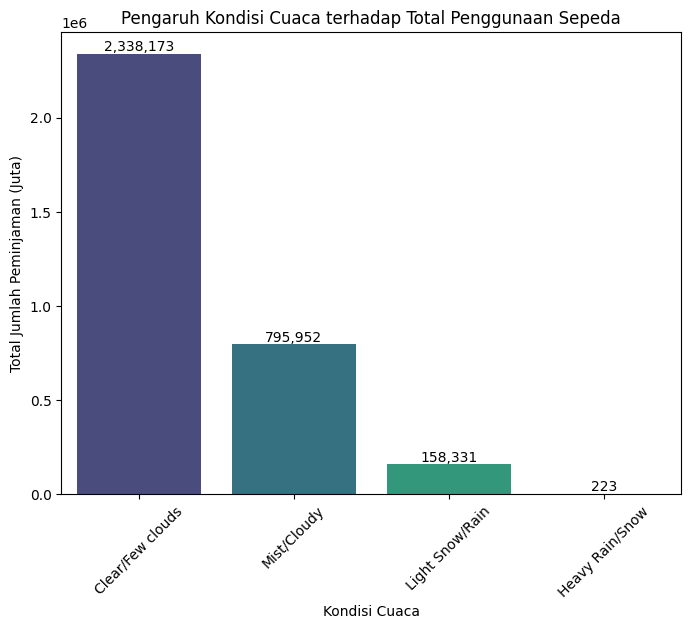

In [30]:
weather_labels = {
    1: "Clear/Few clouds",
    2: "Mist/Cloudy",
    3: "Light Snow/Rain",
    4: "Heavy Rain/Snow"
}
df_hour_full['weather_label'] = df_hour_full['weathersit'].map(weather_labels)

weather_summary = df_hour_full.groupby('weather_label', as_index=False)['cnt'].sum()

weather_order = [
    "Clear/Few clouds",
    "Mist/Cloudy",
    "Light Snow/Rain",
    "Heavy Rain/Snow"
]

plt.figure(figsize=(8,6))
ax = sns.barplot(
    x='weather_label',
    y='cnt',
    data=weather_summary,
    order=weather_order,
    palette='viridis'
)
plt.title('Pengaruh Kondisi Cuaca terhadap Total Penggunaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Jumlah Peminjaman (Juta)')
plt.xticks(rotation=45)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [31]:
total_cnt = weather_summary['cnt'].sum()
weather_summary['percentage'] = (weather_summary['cnt'] / total_cnt * 100).round(2)

weather_summary = weather_summary.set_index('weather_label').loc[weather_order].reset_index()

weather_summary = weather_summary.rename(columns={
    'weather_label': 'Cuaca',
    'cnt': 'Pengguna',
    'percentage': 'Percentage (%)'
})

print(weather_summary)

              Cuaca  Pengguna  Percentage (%)
0  Clear/Few clouds   2338173           71.01
1       Mist/Cloudy    795952           24.17
2   Light Snow/Rain    158331            4.81
3   Heavy Rain/Snow       223            0.01


Tabel Gabungan Persentase:


,Cuaca,Frequency (%),Usage (%)
0,Clear/Few clouds,65.67,71.01
1,Mist/Cloudy,26.15,24.17
2,Light Snow/Rain,8.17,4.81
3,Heavy Rain/Snow,0.02,0.01


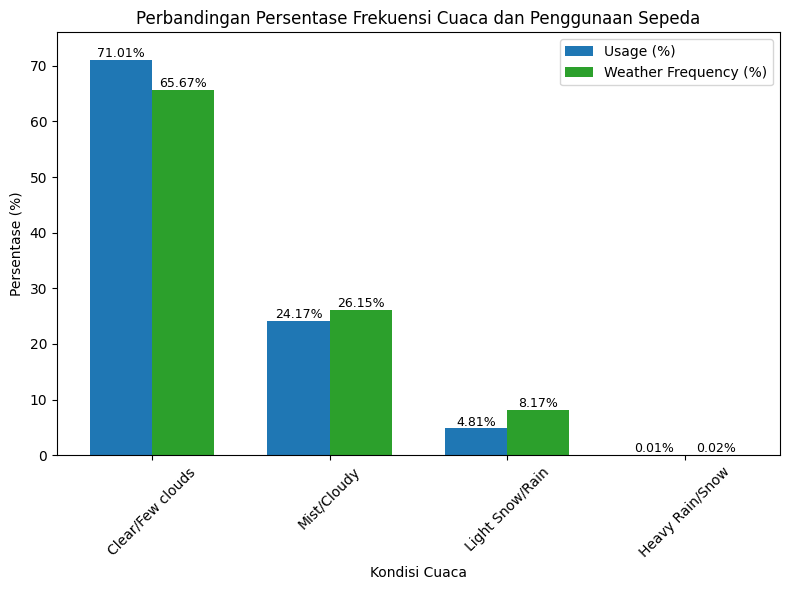

In [32]:
weather_freq = weather_freq.rename(columns={'Percentage (%)': 'Frequency (%)'})

weather_summary = weather_summary.rename(columns={'Percentage (%)': 'Usage (%)'})

weather_merged = pd.merge(
    weather_freq[['Cuaca', 'Frequency (%)']],
    weather_summary[['Cuaca', 'Usage (%)']],
    on='Cuaca',
    how='inner'
)

print("Tabel Gabungan Persentase:")
display(weather_merged)

import numpy as np
plt.figure(figsize=(8,6))
x = np.arange(len(weather_merged))
width = 0.35

plt.bar(x - width/2, weather_merged['Usage (%)'], width, label='Usage (%)', color='tab:blue')
plt.bar(x + width/2, weather_merged['Frequency (%)'], width, label='Weather Frequency (%)', color='tab:green')

plt.xticks(x, weather_merged['Cuaca'], rotation=45)
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Persentase (%)')
plt.title('Perbandingan Persentase Frekuensi Cuaca dan Penggunaan Sepeda')
plt.legend()

for i, v in enumerate(weather_merged['Usage (%)']):
    plt.text(x[i] - width/2, v + 0.5, f"{v:.2f}%", ha='center', fontsize=9)
for i, v in enumerate(weather_merged['Frequency (%)']):
    plt.text(x[i] + width/2, v + 0.5, f"{v:.2f}%", ha='center', fontsize=9)

plt.ylim(0, max(weather_merged['Usage (%)'].max(), weather_merged['Frequency (%)'].max()) + 5)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Apakah tren pengguna (baik casual atau registered) dalam penggunaan bike sharing dalam tahun 2011 dan 2012?

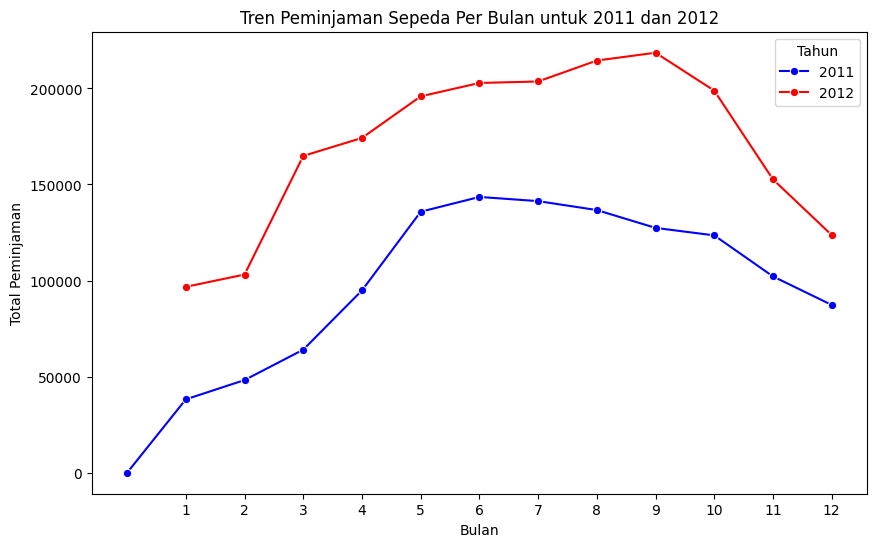

In [33]:
monthly_data = df_hour_full.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()
monthly_data['Year'] = monthly_data['yr'].map({0: 2011, 1: 2012})
monthly_data.rename(columns={'mnth': 'Month', 'cnt': 'Total_Rentals'}, inplace=True)

plt.figure(figsize=(10,6))
sns.lineplot(
    data=monthly_data,
    x='Month',
    y='Total_Rentals',
    hue='Year',
    marker='o',
    palette={2011: 'blue', 2012: 'red'}
)
plt.title("Tren Peminjaman Sepeda Per Bulan untuk 2011 dan 2012")
plt.xlabel("Bulan")
plt.ylabel("Total Peminjaman")
plt.xticks(np.arange(1, 13, 1))
plt.legend(title='Tahun')
plt.show()

In [34]:
pivot_table = monthly_data.pivot(index='Month', columns='Year', values='Total_Rentals')

pivot_table['Change'] = pivot_table[2012] - pivot_table[2011]
pivot_table['Change_str'] = pivot_table['Change'].apply(lambda x: f"+{x:,.0f}" if x >= 0 else f"{x:,.0f}")

def calc_pct(row):
    if row[2011] == 0:
        return None
    return (row[2012] - row[2011]) / row[2011] * 100

pivot_table['Change_pct'] = pivot_table.apply(calc_pct, axis=1)
pivot_table['Change_pct_str'] = pivot_table['Change_pct'].apply(
    lambda x: f"{x:+.2f}%" if x is not None and pd.notnull(x) else "N/A"
)

final_table = pivot_table[[2011, 2012, 'Change_str', 'Change_pct_str']].rename(
    columns={2011: "2011", 2012: "2012", 'Change_str': "Change (abs)", 'Change_pct_str': "Change (%)"}
)

total_2011 = final_table["2011"].sum()
total_2012 = final_table["2012"].sum()
total_change = total_2012 - total_2011
total_change_str = f"+{total_change:,.0f}" if total_change >= 0 else f"{total_change:,.0f}"
if total_2011 != 0:
    total_pct = (total_2012 - total_2011) / total_2011 * 100
    total_pct_str = f"{total_pct:+.2f}%"
else:
    total_pct_str = "N/A"

total_row = pd.DataFrame({
    "2011": [total_2011],
    "2012": [total_2012],
    "Change (abs)": [total_change_str],
    "Change (%)": [total_pct_str]
}, index=["Total"])

final_table = pd.concat([final_table, total_row])

print("Pivot Table Peminjaman Sepeda per Bulan, Perubahan, dan Total Pertahun:")
print(final_table)

Pivot Table Peminjaman Sepeda per Bulan, Perubahan, dan Total Pertahun:
            2011       2012 Change (abs) Change (%)
0            0.0        NaN          nan        N/A
1        38189.0    96744.0      +58,555   +153.33%
2        48215.0   103137.0      +54,922   +113.91%
3        64045.0   164875.0     +100,830   +157.44%
4        94870.0   174224.0      +79,354    +83.64%
5       135821.0   195865.0      +60,044    +44.21%
6       143512.0   202830.0      +59,318    +41.33%
7       141341.0   203607.0      +62,266    +44.05%
8       136691.0   214503.0      +77,812    +56.93%
9       127418.0   218573.0      +91,155    +71.54%
10      123511.0   198841.0      +75,330    +60.99%
11      102167.0   152664.0      +50,497    +49.43%
12       87323.0   123713.0      +36,390    +41.67%
Total  1243103.0  2049576.0     +806,473    +64.88%


## Conclusion

* Conclusion pertanyaan 1
  * Kondisi cuaca kategori 1 (Clear/Few clouds) paling dominan terjadi, hingga 65% total observasi tetapi juga menunjukkan proporsi pengguna tertinggi dengan 71%, mengindikasikan bahwa cuaca ideal secara signifikan mendukung preferensi pengguna untuk aktivitas bike sharing.
  * Kondisi cuaca kategori 2 (Mist/Cloudy) muncul dengan frekuensi sekitar 26% dan penggunaan sepeda mendekati 24%, menunjukkan keseimbangan antara frekuensi cuaca dan pengaruhnya terhadap penggunaan.
  * Kondisi cuaca kategori 3 (Light Snow/Rain) dan kategori 4 (Heavy Rain/Snow) muncul sangat jarang (masing-masing sekitar 8% dan kurang dari 0.1%) dan berkontribusi sangat kecil terhadap total penggunaan sepeda (masing-masing sekitar 5% dan 0.1%), menegaskan bahwa kondisi cuaca yang tidak ideal secara drastis menurunkan minat penggunaan bike sharing.
* Conclusion pertanyaan 2
  * Penggunaan bike sharing paling aktif pada bulan 6 - 9 dan mengalami penurunan pada bulan 10 - 2
  * Tren pengguna, baik registered atau tidak naik secara signifikan dari tahun 2011 ke 2012 sebesar 64.8% untuk keseluruhan dan perubahan paling signifikan terjadi pada bulan 3 dengan kenaikan hingga 157%